## 1. Importing important libraries

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Data

In [3]:
data1 = pd.read_csv('Zoo.csv',sep=',')
data1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 3. Data Understanding

In [4]:
data1.shape

(101, 18)

In [5]:
data1.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
data1.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [7]:
data1.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

## 4. Data Preparation

In [18]:
del data1['animal name']

In [19]:
data1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 5. Model Building 

In [20]:
X = data1.drop('type',axis=1)
y = data1[['type']]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 16), (21, 16), (80, 1), (21, 1))

## 6. Model Training | Testing | Evaluation without NORMALIZATION

### Generating model with k = 3

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524


### Generating a Model with K = 5

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.8571


### Generating a Model with K = 7

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.8571


## Model Training | Testing | Evaluation with NORMALIZATION

### Generating a Model with K = 3

In [27]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80, 1), (21, 16), (21, 1))

In [29]:
X_train

array([[-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306,  1.13818037]])

In [30]:
X_test

array([[-0.86103386, -0.49690399,  0.84372057, -0.82663978, -0.55829053,
         1.34370962,  0.89642146, -1.2349089 , -2.14734979, -1.95180015,
        -0.29329423, -0.44986771,  2.54951445, -1.69841555, -0.38435306,
         1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, -0.82663978, -0.55829053,
         1.34370962,  0.89642146,  0.80977633,  0.46569032, -1.95180015,
        -0.29329423,  2.22287572, -1.40443503,  0.58878406, -0.38435306,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
        -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
        -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771,  0.57253971, -1.69841555,  2.60177454,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524


### Generating a Model with K = 5

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  1.0


### Generating a Model with K = 7

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524


## How to pick up optimum no of k?

In [37]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=scaled_X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [38]:
cv_scores

[0.9509090909090909,
 0.93,
 0.9400000000000001,
 0.9200000000000002,
 0.89,
 0.860909090909091,
 0.860909090909091,
 0.850909090909091,
 0.860909090909091,
 0.860909090909091,
 0.8418181818181818,
 0.8218181818181819,
 0.8218181818181819,
 0.7918181818181818,
 0.7918181818181818,
 0.7827272727272728,
 0.7727272727272728,
 0.7327272727272728,
 0.7127272727272727,
 0.6827272727272726,
 0.6727272727272726,
 0.6527272727272726,
 0.6327272727272726,
 0.6127272727272727,
 0.5636363636363637]

In [39]:
neighbours[cv_scores.index(max(cv_scores))]

1

### Vizualizing the K neighbours wrt CV

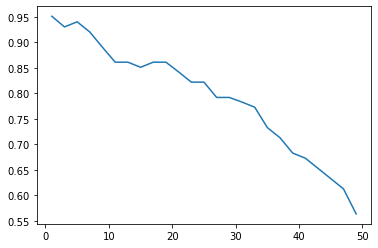

In [42]:
plt.plot(neighbours,cv_scores)

### Rebuild the Model by choosing 1 as the neighrest neighbour

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.9524
